In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')

In [2]:
# simulating a pendulum
THETA_0 = np.pi/36 # 5 degrees
g = 9.80
L = 1.0
omega = np.sqrt(g/L)
def theta(t):
    return THETA_0 * np.cos(omega * t)
def theta_dot(t):
    return -THETA_0 * omega * np.sin(omega*t)
def theta_double_dot(t):
    return -THETA_0 * omega**2 * np.cos(omega*t)
def x_accel(t):
    return g*np.cos(theta(t))

In [3]:
time = np.arange(0,5, 0.01)
accel = []
rad_accel = []
for t in time:
    accel.append(x_accel(t))
    rad_accel.append(theta_double_dot(t))

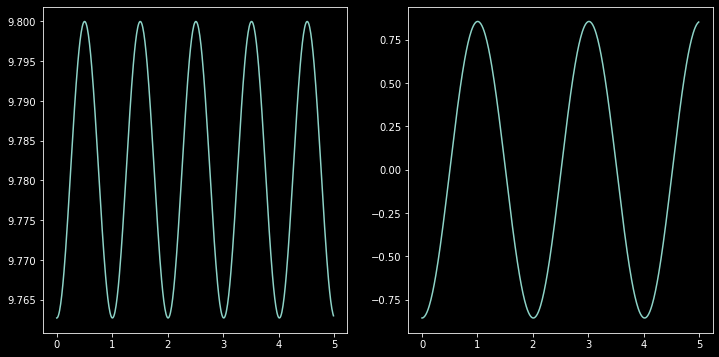

In [4]:
fig,ax = plt.subplots(1,2, figsize = (12, 6))
ax[0].plot(time, accel)
ax[1].plot(time, rad_accel)

In [5]:
# TODO: add damping term

In [6]:
# add artificial noise
accel_noise = 0.002 * np.random.normal(size=len(accel))
rad_accel_noise = 0.2*np.random.normal(size=len(rad_accel))
accel+=accel_noise
rad_accel += rad_accel_noise

In [ ]:
# the hardest part of the fitting is the guessing. As such, these are subject to change:

frequency = np.sqrt(9.8)
theta_initial = np.pi/36

In [7]:
# this is where the actual fitting begins
def theta_accel(t, omega):
    # this function is idential theta_double_dot above, 
    # but takes omega and THETA_0
    # I could have made them the same function but I didn't want to pass omega every time
    return -THETA_0 * omega**2 * np.cos(omega*t)

parameters = [frequency, theta_initial]
def x_accel_to_fit(x, frequency, theta_initial):
    g*np.cos(theta_initial * np.cos(frequency * x))
popt0, pcov0 = curve_fit(theta_accel, time, rad_accel)

c:\users\mhanr\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


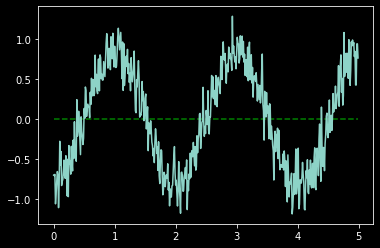

In [8]:
y_fit = x_accel_to_fit()